<h3><span style="color:Blue">
Online Retail Dataset
</span></h3> 

<h3><span style="color:Green">
Overview
</span></h3> 

The Online Retail dataset provides insights into the sales activities of an online store spanning from December 1, 2009, to December 9, 2011. This dataset encompasses a wide range of souvenir products, primarily targeting corporate customers.

<h3><span style="color:Green">
Objective
</span></h3> 

The objective of this analysis is to perform sales forecasting on a retail dataset. By leveraging the different models, we aim to identify the best-fitting model parameters that can accurately predict future sales trends. 

### Variables Description
<h4>This section provides a comprehensive overview of the variables in the Online Retail - II dataset:<br><br>
    a.InvoiceNo: A unique identifier for each transaction. Transactions prefixed with "C" indicate refunds.<br><br>
    b.StockCode: A distinct code assigned to each inventory item.<br><br>
    c.Description: The name of the item purchased.<br><br>
    d.Quantity: The number of items in the transaction.<br><br>
    e.InvoiceDate: The date and time when the transaction took place.<br><br>
    f.Price: The price per item in Sterling.<br><br>
    g.CustomerID: A unique identifier for each customer.<br><br>
    h.Country: The customers country of residence.<br><br>
    

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the datasets
C_items = pd.read_excel("customer_transactions_sample (1).xlsx", sheet_name= "Year 2009-2010")

In [3]:
# Read the datasets
C_items1 = pd.read_excel("customer_transactions_sample (1).xlsx", sheet_name= "Year 2010-2011")

In [4]:
C_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [5]:
C_items1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
# Check for missing values in each column
C_items.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [7]:
C_items[C_items.duplicated()] 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
371,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
383,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,16329.0,United Kingdom
384,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,2009-12-01 11:34:00,0.65,16329.0,United Kingdom
385,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
386,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
...,...,...,...,...,...,...,...,...
523258,538035,20728,LUNCH BAG CARS BLUE,3,2010-12-09 13:03:00,1.65,16065.0,United Kingdom
523356,538051,22659,LUNCH BOX I LOVE LONDON,2,2010-12-09 13:24:00,1.95,18041.0,United Kingdom
525170,538155,21907,I'M ON HOLIDAY METAL SIGN,1,2010-12-09 16:52:00,2.10,16907.0,United Kingdom
525293,538166,21915,RED HARMONICA IN BOX,5,2010-12-09 18:09:00,1.25,17965.0,United Kingdom


In [8]:
C_items['Invoice'] = C_items['Invoice'].astype(str)
df_refunded = C_items[C_items['Invoice'].str.contains('C')]

df_refunded.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia


In [10]:
# Analyze the products with a sale price of 0 and remove these records as well.
# Boolean indexing
df_ZeroPrice = C_items[C_items['Price'] == 0]
df_ZeroPrice.shape

(3687, 8)

In [11]:
C_items.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,525461.0,10.337667,-9600.0,1.0,3.0,10.0,19152.0,107.42411
InvoiceDate,525461,2010-06-28 11:37:36.845017856,2009-12-01 07:45:00,2010-03-21 12:20:00,2010-07-06 09:51:00,2010-10-15 12:45:00,2010-12-09 20:01:00,NaN
Price,525461.0,4.688834,-53594.36,1.25,2.1,4.21,25111.09,146.126914
Customer ID,417534.0,15360.645478,12346.0,13983.0,15311.0,16799.0,18287.0,1680.811316


In [12]:
# Dropping duplicated rows
C_items.drop_duplicates(inplace=True)

In [13]:
#drop rows with missing CustomerID
C_items.dropna(subset=['Customer ID'], inplace=True)

In [14]:
negative_count = (C_items['Price'] < 0).sum()
print(f"Number of negative values in the 'Price' column: {negative_count}")

Number of negative values in the 'Price' column: 0


In [15]:
negative_count = (C_items['Quantity'] < 0).sum()
print(f"Number of negative values in the 'Quantity' column: {negative_count}")

Number of negative values in the 'Quantity' column: 9816


In [16]:
# Filter out rows with negative quantities
df = C_items[C_items['Quantity'] >= 0]

In [17]:
df.drop(df[df['Price'] == 0.0].index, inplace=True)

C:\Users\Imart\AppData\Local\Temp\ipykernel_23020\2920834757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['Price'] == 0.0].index, inplace=True)


In [18]:
df.shape

(400916, 8)

In [19]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,400916.0,13.767418,1.0,2.0,5.0,12.0,19152.0,97.638385
InvoiceDate,400916,2010-07-01 05:01:16.167027712,2009-12-01 07:45:00,2010-03-26 13:28:00,2010-07-09 10:26:00,2010-10-14 13:58:45,2010-12-09 20:01:00,NaN
Price,400916.0,3.305826,0.001,1.25,1.95,3.75,10953.5,35.047719
Customer ID,400916.0,15361.544074,12346.0,13985.0,15311.0,16805.0,18287.0,1680.635823


In [20]:
# Check for missing values in each column
C_items1.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [21]:
C_items1[C_items1.duplicated()] 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [22]:
C_items1['Invoice'] = C_items1['Invoice'].astype(str)
df_refunded = C_items1[C_items1['Invoice'].str.contains('C')]

df_refunded.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [23]:
# Analyze the products with a sale price of 0 and remove these records as well.
# Boolean indexing
df_ZeroPrice = C_items1[C_items1['Price'] == 0]
df_ZeroPrice.shape

(2515, 8)

In [24]:
C_items1.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,541910.0,9.552234,-80995.0,1.0,3.0,10.0,80995.0,218.080957
InvoiceDate,541910,2011-07-04 13:35:22.342307584,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
Price,541910.0,4.611138,-11062.06,1.25,2.08,4.13,38970.0,96.759765
Customer ID,406830.0,15287.68416,12346.0,13953.0,15152.0,16791.0,18287.0,1713.603074


In [25]:
# Dropping duplicated rows
C_items1.drop_duplicates(inplace=True)

In [26]:
#drop rows with missing CustomerID
C_items1.dropna(subset=['Customer ID'], inplace=True)

In [27]:
negative_count = (C_items1['Price'] < 0).sum()
print(f"Number of negative values in the 'Price' column: {negative_count}")

Number of negative values in the 'Price' column: 0


In [28]:
negative_count = (C_items1['Quantity'] < 0).sum()
print(f"Number of negative values in the 'Quantity' column: {negative_count}")

Number of negative values in the 'Quantity' column: 8872


In [29]:
# Filter out rows with negative quantities
df1 = C_items1[C_items1['Quantity'] >= 0]

In [30]:
df1.drop(df1[df1['Price'] == 0.0].index, inplace=True)

C:\Users\Imart\AppData\Local\Temp\ipykernel_23020\35251706.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(df1[df1['Price'] == 0.0].index, inplace=True)


In [31]:
df1.shape

(392693, 8)

In [32]:
df1.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,392693.0,13.119671,1.0,2.0,6.0,12.0,80995.0,180.492603
InvoiceDate,392693,2011-07-10 19:13:41.156272128,2010-12-01 08:26:00,2011-04-07 11:12:00,2011-07-31 12:02:00,2011-10-20 12:53:00,2011-12-09 12:50:00,NaN
Price,392693.0,3.125952,0.001,1.25,1.95,3.75,8142.75,22.24182
Customer ID,392693.0,15287.837224,12346.0,13955.0,15150.0,16791.0,18287.0,1713.542421


In [33]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [34]:
df1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [35]:
df["TotalPrice"] = df["Quantity"] * df["Price"]

C:\Users\Imart\AppData\Local\Temp\ipykernel_23020\723398808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TotalPrice"] = df["Quantity"] * df["Price"]


In [36]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [37]:
df1["TotalPrice"] = df1["Quantity"] * df1["Price"]

C:\Users\Imart\AppData\Local\Temp\ipykernel_23020\82513005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["TotalPrice"] = df1["Quantity"] * df1["Price"]


In [38]:
df1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [39]:
final_df = pd.concat([df, df1], ignore_index=True)

In [40]:
final_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [41]:
final_df.shape

(793609, 9)

In [42]:
final_df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
793604,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
793605,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
793606,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
793607,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85
793608,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France,18.00


In [43]:
final_df['InvoiceDate'] = pd.to_datetime(final_df['InvoiceDate'], format='%m/%d/%Y ')

In [44]:
final_df['year_month'] = final_df['InvoiceDate'].dt.to_period('M')


In [45]:
final_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,year_month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12


In [46]:
final_df.shape

(793609, 10)

In [47]:
final_df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,year_month
793604,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12
793605,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12
793606,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12
793607,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,2011-12
793608,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France,18.00,2011-12


In [48]:
sales_data = final_df.loc[:, ['year_month', 'TotalPrice']].groupby('year_month')['TotalPrice'].sum()

# Print the resulting sales_data
print(sales_data)

year_month
2009-12     683504.010
2010-01     555802.672
2010-02     504558.956
2010-03     696978.471
2010-04     591982.002
2010-05     597833.380
2010-06     636371.130
2010-07     589736.170
2010-08     602224.600
2010-09     829013.951
2010-10    1033112.010
2010-11    1166460.022
2010-12     881079.100
2011-01     568101.310
2011-02     446084.920
2011-03     594081.760
2011-04     468374.331
2011-05     677355.150
2011-06     660046.050
2011-07     598962.901
2011-08     644051.040
2011-09     950690.202
2011-10    1035642.450
2011-11    1156205.610
2011-12     517208.440
Freq: M, Name: TotalPrice, dtype: float64


In [47]:
sales_data

year_month
2009-12     683504.010
2010-01     555802.672
2010-02     504558.956
2010-03     696978.471
2010-04     591982.002
2010-05     597833.380
2010-06     636371.130
2010-07     589736.170
2010-08     602224.600
2010-09     829013.951
2010-10    1033112.010
2010-11    1166460.022
2010-12     881079.100
2011-01     568101.310
2011-02     446084.920
2011-03     594081.760
2011-04     468374.331
2011-05     677355.150
2011-06     660046.050
2011-07     598962.901
2011-08     644051.040
2011-09     950690.202
2011-10    1035642.450
2011-11    1156205.610
2011-12     517208.440
Freq: M, Name: TotalPrice, dtype: float64

<h3><span style="color:green">
 Time Series Forecasting
</span></h3> 

In simple terms, time-series forecasting uses historical and current data to predict future values over a period or at a specific point in the future. By analyzing past data, we can make informed decisions, guide business strategy, and understand future trends.

To perform the time series analysis, we have to follow the following steps:

1.Collecting the data and cleaning it
2.Preparing Visualization with respect to time vs key feature
3.Observing the stationarity of the series
4.Developing charts to understand its nature.
5.Model building – AR,MA,ARMA,ARIMA,SARIMA,SES,VAR,LSTM,

Select the appropriate model based on:
1.Trend: In which there is no fixed interval and any divergence within the given dataset is a continuous timeline. The trend would be Negative or Positive or Null Trend
2.Seasonality: In which regular or fixed interval shifts within the dataset in a continuous timeline. Would be bell curve or saw tooth
3.Cyclical: In which there is no fixed interval, uncertainty in movement and its pattern
4.Irregularity: Unexpected situations/events/scenarios and spikes in a short time span.

Data Types of Time Series:
    1.Stationary
    2.Non- Stationary

Methods to Check Stationarity
During the TSA model preparation workflow, we must assess whether the dataset is stationary or not. This is done using Statistical Tests. There are two tests available to test if the dataset is stationary:

1.Augmented Dickey-Fuller (ADF) Test or Unit Root Test
The ADF test is the most popular statistical test. It is done with the following assumptions:

Null Hypothesis (H0): Series is non-stationary
Alternate Hypothesis (HA): Series is stationary
p-value >0.05 Fail to reject (H0)
p-value <= 0.05 Accept (H1)
2.Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test

Converting Non-Stationary Into Stationary:
    1.Detrending
    2.Differencing
    3.Transformation

In [49]:
sales_data= pd.DataFrame(sales_data)

In [50]:
sales_data

,TotalPrice
year_month,
2009-12,683504.010
2010-01,555802.672
2010-02,504558.956
2010-03,696978.471
2010-04,591982.002
2010-05,597833.380
2010-06,636371.130
2010-07,589736.170
2010-08,602224.600


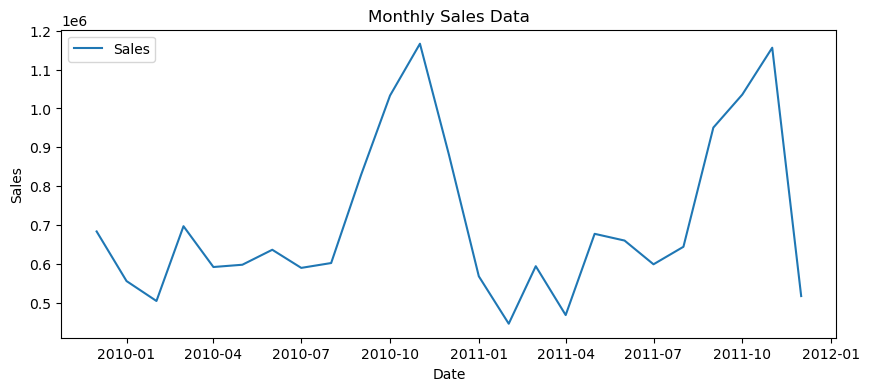

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Example sales data
# Replace this with your actual sales data
 
# Convert PeriodIndex to datetime index for plotting
sales_data.index = sales_data.index.to_timestamp()

# Plot the sales data
plt.figure(figsize=(10, 4))
plt.plot(sales_data, label='Sales')
plt.title('Monthly Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


Seasonality in time series data refers to patterns that repeat over a specific time period. In the graph, it appears there are sales fluctuations that occur throughout the year, possibly indicating higher sales in some months compared to others.

A SARIMA (Seasonal Autoregressive Integrated Moving Average) model is a statistical method specifically designed to forecast time series data with seasonality. It  combines the strengths of ARIMA models, which capture non-seasonal patterns, with additional components to account for seasonal effects.

# ARIMA Model

In [52]:
# Split the data into training and test sets
train_size = int(len(sales_data) * 0.8)
train, test = sales_data[0:train_size], sales_data[train_size:]

print(f'Training set length: {len(train)}')
print(f'Test set length: {len(test)}')

Training set length: 20
Test set length: 5


In [53]:
# Build and train the ARIMA model
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             TotalPrice   No. Observations:                   20
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -252.531
Date:                Mon, 10 Jun 2024   AIC                            517.063
Time:                        16:26:24   BIC                            522.729
Sample:                    12-01-2009   HQIC                           518.022
                         - 07-01-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0761      0.186     -0.410      0.682      -0.440       0.288
ar.L2         -0.1715      0.212     -0.807      0.420      -0.588       0.245
ar.L3         -0.0169      0.159     -0.107      0.9

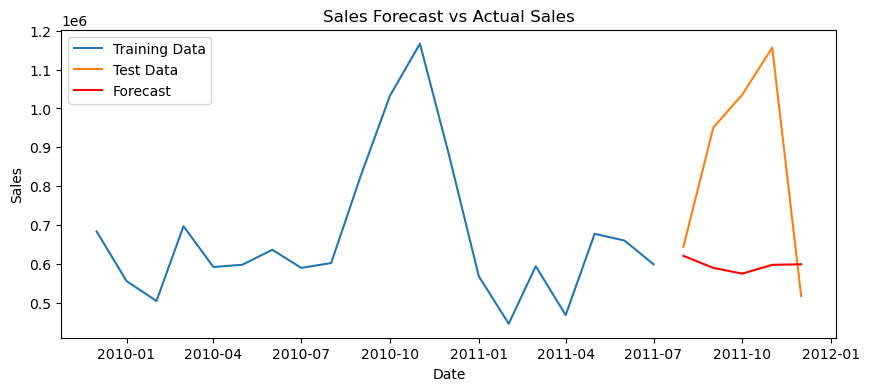

Mean Squared Error: 132378005887.88477


In [54]:
# Forecast the future sales
forecast = model_fit.forecast(steps=len(test))

# Plot the forecast against the actual sales
plt.figure(figsize=(10, 4))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('Sales Forecast vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Evaluate the model
mse = mean_squared_error(test, forecast)
print(f'Mean Squared Error: {mse}')


ARIMA model wouldn't be ideal for the data because it exhibits seasonality


# SARIMAX Model

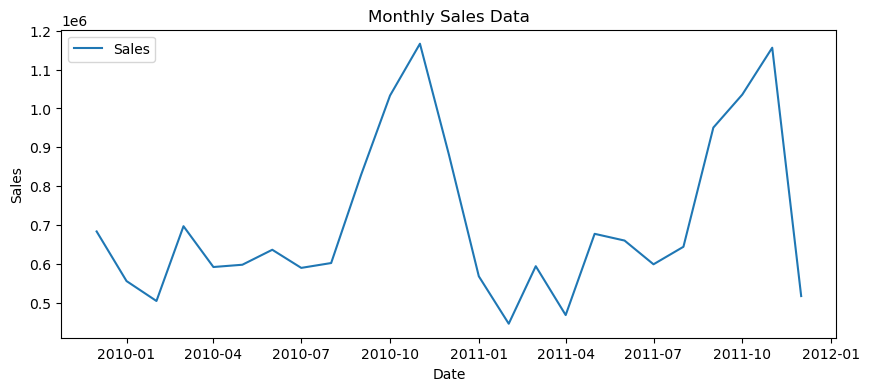

In [55]:
import matplotlib.pyplot as plt

# Plot the sales data
plt.figure(figsize=(10, 4))
plt.plot(sales_data, label='Sales')
plt.title('Monthly Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [65]:
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [68]:
import itertools
import pandas as pd
import statsmodels.api as sm

# Example sales_data
# Assuming sales_data is a pandas Series
# sales_data = pd.Series(...)

# Define the p, d, and q parameters to take any value between 0 and 1
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))

# Define the seasonal p, d, and q parameters to take any value between 0 and 1
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            print(f"Trying SARIMAX with parameters: order={param}, seasonal_order={param_seasonal}")
            mod = sm.tsa.statespace.SARIMAX(sales_data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except Exception as e:
            print(f"Error with parameters: order={param}, seasonal_order={param_seasonal}. Error: {e}")
            continue


Trying SARIMAX with parameters: order=(0, 0, 0), seasonal_order=(0, 0, 0, 12)
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:718.7358515537034
Trying SARIMAX with parameters: order=(0, 0, 0), seasonal_order=(0, 0, 1, 12)
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:323.4664379610967
Trying SARIMAX with parameters: order=(0, 0, 0), seasonal_order=(0, 1, 0, 12)
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:319.72747910913125
Trying SARIMAX with parameters: order=(0, 0, 0), seasonal_order=(0, 1, 1, 12)
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4.0
Trying SARIMAX with parameters: order=(0, 0, 0), seasonal_order=(1, 0, 0, 12)
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:347.1025404601491
Trying SARIMAX with parameters: order=(0, 0, 0), seasonal_order=(1, 0, 1, 12)


C:\Users\Imart\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Imart\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Imart\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:1234: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /
C:\Users\Imart\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('

ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:323.4420197877864
Trying SARIMAX with parameters: order=(0, 0, 0), seasonal_order=(1, 1, 0, 12)
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:29.400072684898642
Trying SARIMAX with parameters: order=(0, 0, 0), seasonal_order=(1, 1, 1, 12)
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:6.0
Trying SARIMAX with parameters: order=(0, 0, 1), seasonal_order=(0, 0, 0, 12)
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:673.544047374617
Trying SARIMAX with parameters: order=(0, 0, 1), seasonal_order=(0, 0, 1, 12)
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:345.0829980876578
Trying SARIMAX with parameters: order=(0, 0, 1), seasonal_order=(0, 1, 0, 12)


C:\Users\Imart\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Imart\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:1234: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /
C:\Users\Imart\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:294.0127154385415
Trying SARIMAX with parameters: order=(0, 0, 1), seasonal_order=(0, 1, 1, 12)
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:6.0
Trying SARIMAX with parameters: order=(0, 0, 1), seasonal_order=(1, 0, 0, 12)
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:411.7877043923743
Trying SARIMAX with parameters: order=(0, 0, 1), seasonal_order=(1, 0, 1, 12)


C:\Users\Imart\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Imart\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Imart\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:346.8705245711351
Trying SARIMAX with parameters: order=(0, 0, 1), seasonal_order=(1, 1, 0, 12)
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:31.50634191351645
Trying SARIMAX with parameters: order=(0, 0, 1), seasonal_order=(1, 1, 1, 12)
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:8.0
Trying SARIMAX with parameters: order=(0, 1, 0), seasonal_order=(0, 0, 0, 12)
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:630.0490422097773
Trying SARIMAX with parameters: order=(0, 1, 0), seasonal_order=(0, 0, 1, 12)
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:296.80079689663677
Trying SARIMAX with parameters: order=(0, 1, 0), seasonal_order=(0, 1, 0, 12)
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:296.0538757837007
Trying SARIMAX with parameters: order=(0, 1, 0), seasonal_order=(0, 1, 1, 12)


C:\Users\Imart\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Imart\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Imart\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:4.0
Trying SARIMAX with parameters: order=(0, 1, 0), seasonal_order=(1, 0, 0, 12)
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:319.47804615324503
Trying SARIMAX with parameters: order=(0, 1, 0), seasonal_order=(1, 0, 1, 12)
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:297.39435719871807
Trying SARIMAX with parameters: order=(0, 1, 0), seasonal_order=(1, 1, 0, 12)
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:4.0
Trying SARIMAX with parameters: order=(0, 1, 0), seasonal_order=(1, 1, 1, 12)
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:6.0
Trying SARIMAX with parameters: order=(0, 1, 1), seasonal_order=(0, 0, 0, 12)
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:605.5530170120878
Trying SARIMAX with parameters: order=(0, 1, 1), seasonal_order=(0, 0, 1, 12)


C:\Users\Imart\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Imart\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:1234: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /
C:\Users\Imart\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Imart\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('

ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:273.3768214379132
Trying SARIMAX with parameters: order=(0, 1, 1), seasonal_order=(0, 1, 0, 12)
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:269.41952363829665
Trying SARIMAX with parameters: order=(0, 1, 1), seasonal_order=(0, 1, 1, 12)
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:6.0
Trying SARIMAX with parameters: order=(0, 1, 1), seasonal_order=(1, 0, 0, 12)


C:\Users\Imart\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Imart\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:326.19962083381984
Trying SARIMAX with parameters: order=(0, 1, 1), seasonal_order=(1, 0, 1, 12)
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:274.22493601423844
Trying SARIMAX with parameters: order=(0, 1, 1), seasonal_order=(1, 1, 0, 12)
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:6.0
Trying SARIMAX with parameters: order=(0, 1, 1), seasonal_order=(1, 1, 1, 12)
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:8.0
Trying SARIMAX with parameters: order=(1, 0, 0), seasonal_order=(0, 0, 0, 12)


C:\Users\Imart\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Imart\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:1234: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /
C:\Users\Imart\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Imart\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('

ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:658.026739255904
Trying SARIMAX with parameters: order=(1, 0, 0), seasonal_order=(0, 0, 1, 12)
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:325.178720308496
Trying SARIMAX with parameters: order=(1, 0, 0), seasonal_order=(0, 1, 0, 12)
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:319.23835729139904
Trying SARIMAX with parameters: order=(1, 0, 0), seasonal_order=(0, 1, 1, 12)


C:\Users\Imart\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Imart\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:1234: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /
C:\Users\Imart\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:6.0
Trying SARIMAX with parameters: order=(1, 0, 0), seasonal_order=(1, 0, 0, 12)
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:324.8470187074679
Trying SARIMAX with parameters: order=(1, 0, 0), seasonal_order=(1, 0, 1, 12)
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:325.1273594623432
Trying SARIMAX with parameters: order=(1, 0, 0), seasonal_order=(1, 1, 0, 12)


C:\Users\Imart\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:1234: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /
C:\Users\Imart\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Imart\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:1234: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /
C:\Users\Imart\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:6.0
Trying SARIMAX with parameters: order=(1, 0, 0), seasonal_order=(1, 1, 1, 12)
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:8.0
Trying SARIMAX with parameters: order=(1, 0, 1), seasonal_order=(0, 0, 0, 12)
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:633.2494527725748
Trying SARIMAX with parameters: order=(1, 0, 1), seasonal_order=(0, 0, 1, 12)
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:301.28275010582735
Trying SARIMAX with parameters: order=(1, 0, 1), seasonal_order=(0, 1, 0, 12)
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:295.7923910909407
Trying SARIMAX with parameters: order=(1, 0, 1), seasonal_order=(0, 1, 1, 12)
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:8.0
Trying SARIMAX with parameters: order=(1, 0, 1), seasonal_order=(1, 0, 0, 12)


C:\Users\Imart\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Imart\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:327.0362210563191
Trying SARIMAX with parameters: order=(1, 0, 1), seasonal_order=(1, 0, 1, 12)
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:301.4152535612543
Trying SARIMAX with parameters: order=(1, 0, 1), seasonal_order=(1, 1, 0, 12)
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:8.0
Trying SARIMAX with parameters: order=(1, 0, 1), seasonal_order=(1, 1, 1, 12)
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:10.0
Trying SARIMAX with parameters: order=(1, 1, 0), seasonal_order=(0, 0, 0, 12)
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:631.9161886412478
Trying SARIMAX with parameters: order=(1, 1, 0), seasonal_order=(0, 0, 1, 12)


C:\Users\Imart\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:1234: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /
C:\Users\Imart\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Imart\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:299.06735733469327
Trying SARIMAX with parameters: order=(1, 1, 0), seasonal_order=(0, 1, 0, 12)
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:295.0127621915229
Trying SARIMAX with parameters: order=(1, 1, 0), seasonal_order=(0, 1, 1, 12)


C:\Users\Imart\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Imart\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Imart\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:6.0
Trying SARIMAX with parameters: order=(1, 1, 0), seasonal_order=(1, 0, 0, 12)
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:299.0670042951362
Trying SARIMAX with parameters: order=(1, 1, 0), seasonal_order=(1, 0, 1, 12)
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:299.87560394483916
Trying SARIMAX with parameters: order=(1, 1, 0), seasonal_order=(1, 1, 0, 12)
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:6.0
Trying SARIMAX with parameters: order=(1, 1, 0), seasonal_order=(1, 1, 1, 12)
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:8.0
Trying SARIMAX with parameters: order=(1, 1, 1), seasonal_order=(0, 0, 0, 12)


C:\Users\Imart\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Imart\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:607.7278865800718
Trying SARIMAX with parameters: order=(1, 1, 1), seasonal_order=(0, 0, 1, 12)
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:288.2867160090555
Trying SARIMAX with parameters: order=(1, 1, 1), seasonal_order=(0, 1, 0, 12)
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:268.56374356148837
Trying SARIMAX with parameters: order=(1, 1, 1), seasonal_order=(0, 1, 1, 12)
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:8.0
Trying SARIMAX with parameters: order=(1, 1, 1), seasonal_order=(1, 0, 0, 12)
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:316.64861290088345
Trying SARIMAX with parameters: order=(1, 1, 1), seasonal_order=(1, 0, 1, 12)


C:\Users\Imart\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Imart\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:289.80210491334327
Trying SARIMAX with parameters: order=(1, 1, 1), seasonal_order=(1, 1, 0, 12)
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:8.0
Trying SARIMAX with parameters: order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:10.0


C:\Users\Imart\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Imart\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


The above output suggests that SARIMAX(0, 0, 0)x(1, 1, 1, 12) yields the lowest AIC value of 297.78. Therefore we should consider this to be optimal option.

In [69]:
# Split the data into training and test sets
train_size = int(len(sales_data) * 0.8)
train, test = sales_data[0:train_size], sales_data[train_size:]


Fitting in the model

In [70]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMA model
model = SARIMAX(train, 
                order=(0, 0, 0), 
                seasonal_order=(0, 1, 1, 12), 
                enforce_stationarity=False, 
                enforce_invertibility=False)
model_fit = model.fit(disp=False)

# Print the model summary
print(model_fit.summary())


                                 SARIMAX Results                                  
Dep. Variable:                 TotalPrice   No. Observations:                   20
Model:             SARIMAX(0, 1, [1], 12)   Log Likelihood                   0.000
Date:                    Mon, 10 Jun 2024   AIC                              4.000
Time:                            16:44:09   BIC                                nan
Sample:                        12-01-2009   HQIC                               nan
                             - 07-01-2011                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12            0         -0        nan        nan           0           0
sigma2      8.363e+09         -0       -inf      0.000    8.36e+09    8.36e+09
Ljung-Box (L1) (Q): 

C:\Users\Imart\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Imart\anaconda3\Lib\site-packages\statsmodels\tools\eval_measures.py:415: RuntimeWarning: invalid value encountered in log
  return -2.0 * llf + np.log(nobs) * df_modelwc
C:\Users\Imart\anaconda3\Lib\site-packages\statsmodels\tools\eval_measures.py:440: RuntimeWarning: invalid value encountered in log
  return -2.0 * llf + 2 * np.log(np.log(nobs)) * df_modelwc
C:\Users\Imart\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3015: RuntimeWarning: divide by zero encountered in divide
  return self.params / self.bse
C:\Users\Imart\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3015: RuntimeWarning: invalid value encountered in divide
  return self.params 

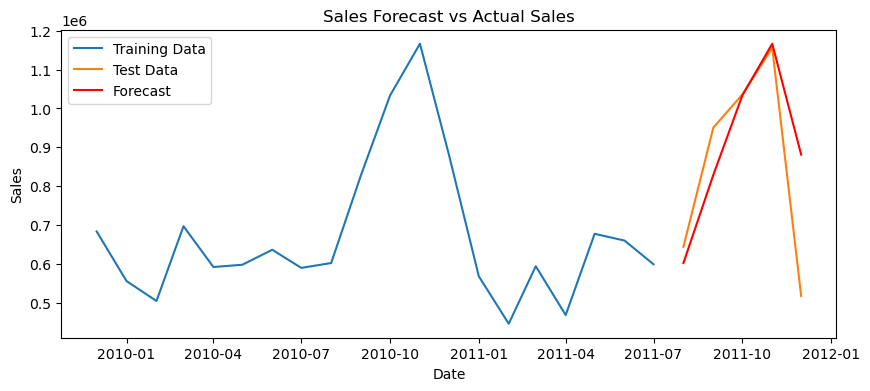

Mean Squared Error: 29813594888.27671


In [71]:
# Forecast the future sales
forecast = model_fit.get_forecast(steps=len(test))
forecast_index = test.index
forecast_values = forecast.predicted_mean

# Plot the forecast against the actual sales
plt.figure(figsize=(10, 4))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
plt.title('Sales Forecast vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test, forecast_values)
print(f'Mean Squared Error: {mse}')


SARIMAX model would be ideal for the data 

In [59]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(sales_data['TotalPrice'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Value (%s): %.3f' % (key, value))


ADF Statistic: -4.247978796240201
p-value: 0.0005459490019995698
Critical Value (1%): -3.924
Critical Value (5%): -3.068
Critical Value (10%): -2.674


Directly applying SARIMAX to the data in the graph you sent might result in inaccurate forecasts because the data appears to be non-stationary. Time series data is considered stationary if its statistical properties, like mean, variance, and covariance, are constant over time. In the graph, the sales data clearly shows a seasonal pattern, with sales rising and falling throughout the year. This seasonality makes the data non-stationary.

Null Hypothesis (H0): Series is non-stationary
Alternate Hypothesis (HA): Series is stationary
p-value >0.05 Fail to reject (H0)
p-value <= 0.05 Accept (H1)
Note: Here 0.0005459490019995698<0.05 Accept (H1)  data Stationary

In [ ]:
# Differencing
sales_data_diff = sales_data.diff().dropna()

# Plot differenced data
plt.figure(figsize=(10, 4))
plt.plot(sales_data_diff, label='Differenced Sales')
plt.title('Differenced Monthly Sales Data')
plt.xlabel('Date')
plt.ylabel('Differenced Sales')
plt.legend()
plt.show()

# Perform ADF test on differenced data
result_diff = adfuller(sales_data_diff['TotalPrice'])
print('ADF Statistic (Differenced Data):', result_diff[0])
print('p-value (Differenced Data):', result_diff[1])
for key, value in result_diff[4].items():
    print('Critical Value (%s): %.3f' % (key, value))
